In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

import pickle
import json

## Problem Statement

In [ ]:
To predict medical insurance charges using following features

Features:
    'age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'
    

## Data Gathering

In [78]:
df= pd.read_csv('medical_insurance.csv')
# df

In [79]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## EDA & Feature Engineering

#### age

In [80]:
All right

SyntaxError: invalid syntax (1422638155.py, line 1)

#### gender

In [81]:
df.gender.value_counts().to_dict()

{'male': 676, 'female': 662}

In [82]:
df['gender'].replace({'male': 0, 'female': 1},inplace=True)
df['gender']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: gender, Length: 1338, dtype: int64

#### bmi

In [83]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

#### children

In [84]:
df['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

#### smoker

In [85]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [86]:
df['smoker'].replace({'no':0 , 'yes': 1},inplace = True)
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

#### region

In [87]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [88]:
df = pd.get_dummies(df, ['region'])
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


## Data Split

In [89]:
x = df.drop('charges',axis = 1)
y = df['charges']
# y

## Feature Selection

In [90]:
df[['age','gender','bmi','children','smoker','charges']].corr()[-1:].T

,charges
age,0.299008
gender,-0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
charges,1.000000


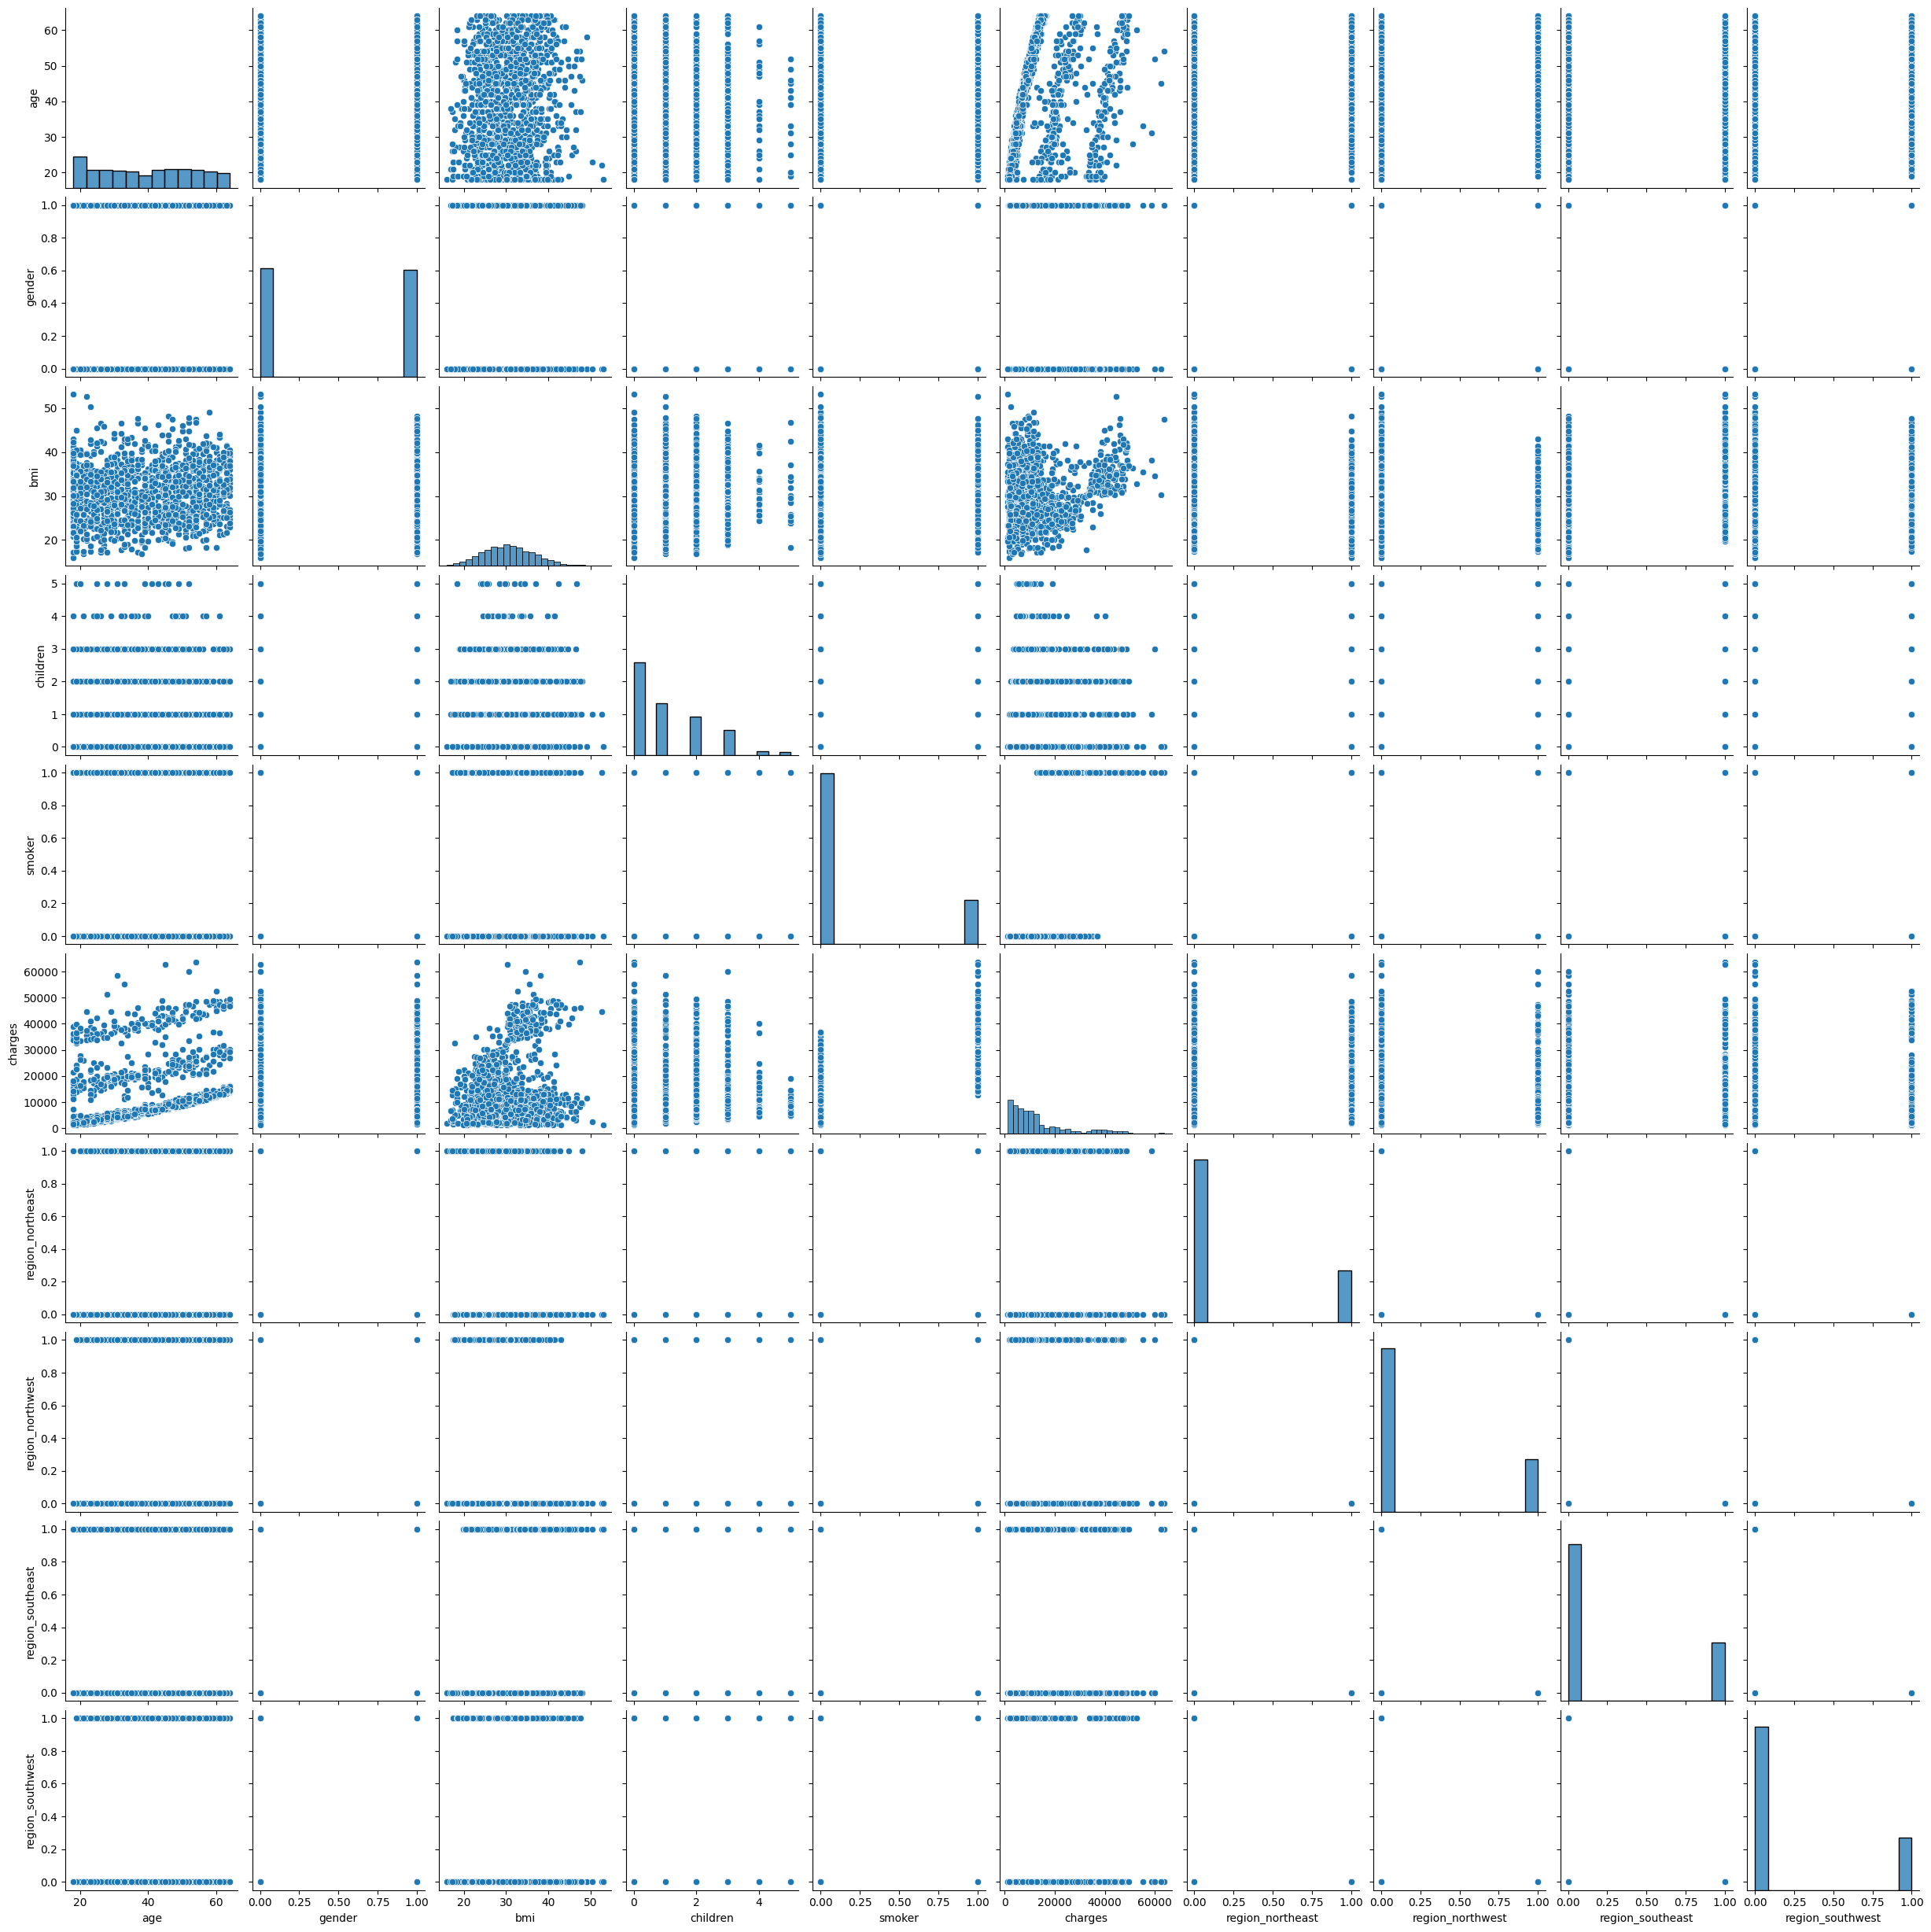

In [91]:
sns.pairplot(df)
# plt.show()

<AxesSubplot: >

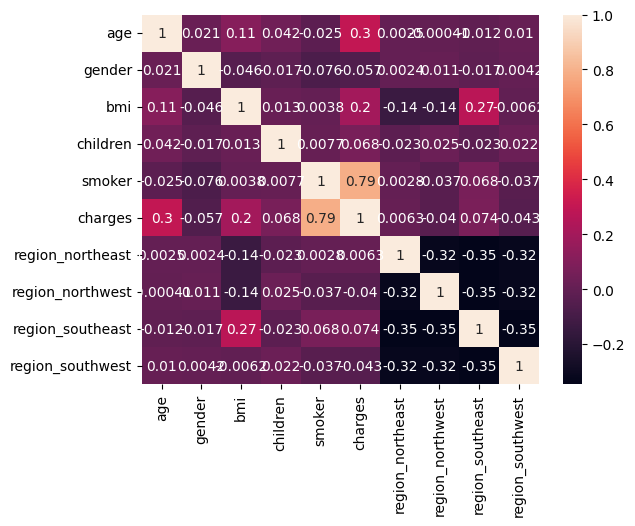

In [92]:
sns.heatmap(df.corr(), annot=True)

In [93]:
vif_list =[]
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x,i)
    vif_list.append(vif)
vif_list

[1.0168221490038107,
 1.0089001621005733,
 1.106629732428617,
 1.0040106421370243,
 1.0120736649061481,
 8.810361912169723,
 8.855810965091548,
 11.779149322157394,
 9.436480190645842]

In [94]:
vif_data = pd.Series(vif_list, index = x.columns)
vif_data

age                  1.016822
gender               1.008900
bmi                  1.106630
children             1.004011
smoker               1.012074
region_northeast     8.810362
region_northwest     8.855811
region_southeast    11.779149
region_southwest     9.436480
dtype: float64

## Train Test Split

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [96]:
lin_reg = LinearRegression()

In [97]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred = lin_reg.predict(x_test)
y_pred[1:6]

array([ 5271.40259325, 10846.58938687,  8686.79327608, 12450.9181254 ,
       10967.61928289])

### Evaluaion of Testing

In [99]:
y_pred = lin_reg.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value         :",r2_value)


Root Mean Squared Error : 5270.79216902038
Mean Absolute Error     : 3804.1984165419353
R-Squared Value         : 0.7996633930323263


### Evaluation of Training

In [100]:
y_pred_train = lin_reg.predict(x_train)


mse = mean_squared_error(y_train, y_pred_train)
# print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value         :",r2_value)


Root Mean Squared Error : 6225.398155168251
Mean Absolute Error     : 4308.5844120619095
R-Squared Value         : 0.7390019992731405


## Single Row testing

In [109]:
lin_reg.predict(x_test)[3:4][0]


8686.79327607581

In [102]:
x.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [119]:
age = 30
gender = 'male'
bmi = 28.265
children = 2
smoker = 'yes'
region = 'northwest'

gender_labels = {'male': 0, 'female': 1}
smoker_labels = {'no':0 , 'yes': 1}


gender = gender_labels[gender]
smoker = smoker_labels[smoker]

region = 'region_'+region
column_names = x.columns.to_list()

region_index = column_names.index(region)
region_index

6

In [121]:
test_array = np.zeros([1,lin_reg.n_features_in_])
test_array[0,0] = age
test_array[0,1] = gender
test_array[0,2] = bmi
test_array[0,3] = children
test_array[0,4] = smoker
test_array[0,region_index] = 1

In [125]:
predicted_charges = np.around(lin_reg.predict(test_array)[0],3)
predicted_charges

29233.946

In [127]:
with open ('medical_insurance.pkl', 'wb') as f:
    pickle.dump(lin_reg,f)
    

In [128]:
project_data = {"Gender": gender_labels,
               "Smoker":smoker_labels,
               "Column Names" : column_names}


with open ('Json_Data.json', "w") as f:
    json.dump(project_data,f)